# General Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from collections import OrderedDict


from lapd_codes.crime_codes import crime_codes
from lapd_codes.mo_codes import mo_codes

## Retreive Data From LA City's API

In [2]:
max_rows = 2000000
url = 'https://data.lacity.org/resource/7fvc-faax.csv?$limit=' + str(max_rows)
df = pd.read_csv(url)

In [3]:
print(len(df))

1683309


## Column Titles

In [85]:
list(df)

['area_id',
 'area_name',
 'crm_cd',
 'crm_cd_1',
 'crm_cd_2',
 'crm_cd_3',
 'crm_cd_4',
 'crm_cd_desc',
 'cross_street',
 'date_occ',
 'date_rptd',
 'dr_no',
 'location',
 'location_1',
 'location_1_address',
 'location_1_city',
 'location_1_state',
 'location_1_zip',
 'mocodes',
 'premis_cd',
 'premis_desc',
 'rpt_dist_no',
 'status',
 'status_desc',
 'time_occ',
 'vict_age',
 'vict_descent',
 'vict_sex',
 'weapon_desc',
 'weapon_used_cd']

## Analysis

In [107]:
df.describe()

,area_id,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,dr_no,location_1_address,location_1_city,location_1_state,location_1_zip,premis_cd,rpt_dist_no,time_occ,vict_age,weapon_used_cd
count,1.678869e+06,1.678869e+06,1.678863e+06,106333.000000,2388.000000,77.000000,1.678869e+06,0.0,0.0,0.0,0.0,1.678767e+06,1.678869e+06,1.678869e+06,1.543733e+06,555918.000000
mean,1.114423e+01,5.068250e+02,5.066986e+02,953.356869,970.369765,969.493506,1.379171e+08,NaN,NaN,NaN,NaN,3.120050e+02,1.160799e+03,1.363545e+03,3.596262e+01,370.610973
std,5.992222e+00,2.104877e+02,2.103987e+02,124.557931,88.837930,92.834973,2.360471e+07,NaN,NaN,NaN,NaN,2.104465e+02,5.992178e+02,6.466978e+02,1.681131e+01,113.956952
min,1.000000e+00,1.100000e+02,1.100000e+02,210.000000,93.000000,421.000000,2.100000e+02,NaN,NaN,NaN,NaN,1.010000e+02,1.000000e+02,1.000000e+00,1.000000e+01,101.000000
25%,6.000000e+00,3.300000e+02,3.300000e+02,998.000000,998.000000,998.000000,1.203131e+08,NaN,NaN,NaN,NaN,1.020000e+02,6.450000e+02,9.300000e+02,2.300000e+01,400.000000
50%,1.200000e+01,4.400000e+02,4.400000e+02,998.000000,998.000000,998.000000,1.406149e+08,NaN,NaN,NaN,NaN,2.100000e+02,1.204000e+03,1.430000e+03,3.400000e+01,400.000000
75%,1.600000e+01,6.260000e+02,6.260000e+02,998.000000,998.000000,998.000000,1.606175e+08,NaN,NaN,NaN,NaN,5.010000e+02,1.676000e+03,1.900000e+03,4.800000e+01,400.000000
max,2.100000e+01,9.560000e+02,9.990000e+02,999.000000,999.000000,999.000000,9.102204e+08,NaN,NaN,NaN,NaN,9.710000e+02,2.198000e+03,2.359000e+03,9.900000e+01,516.000000


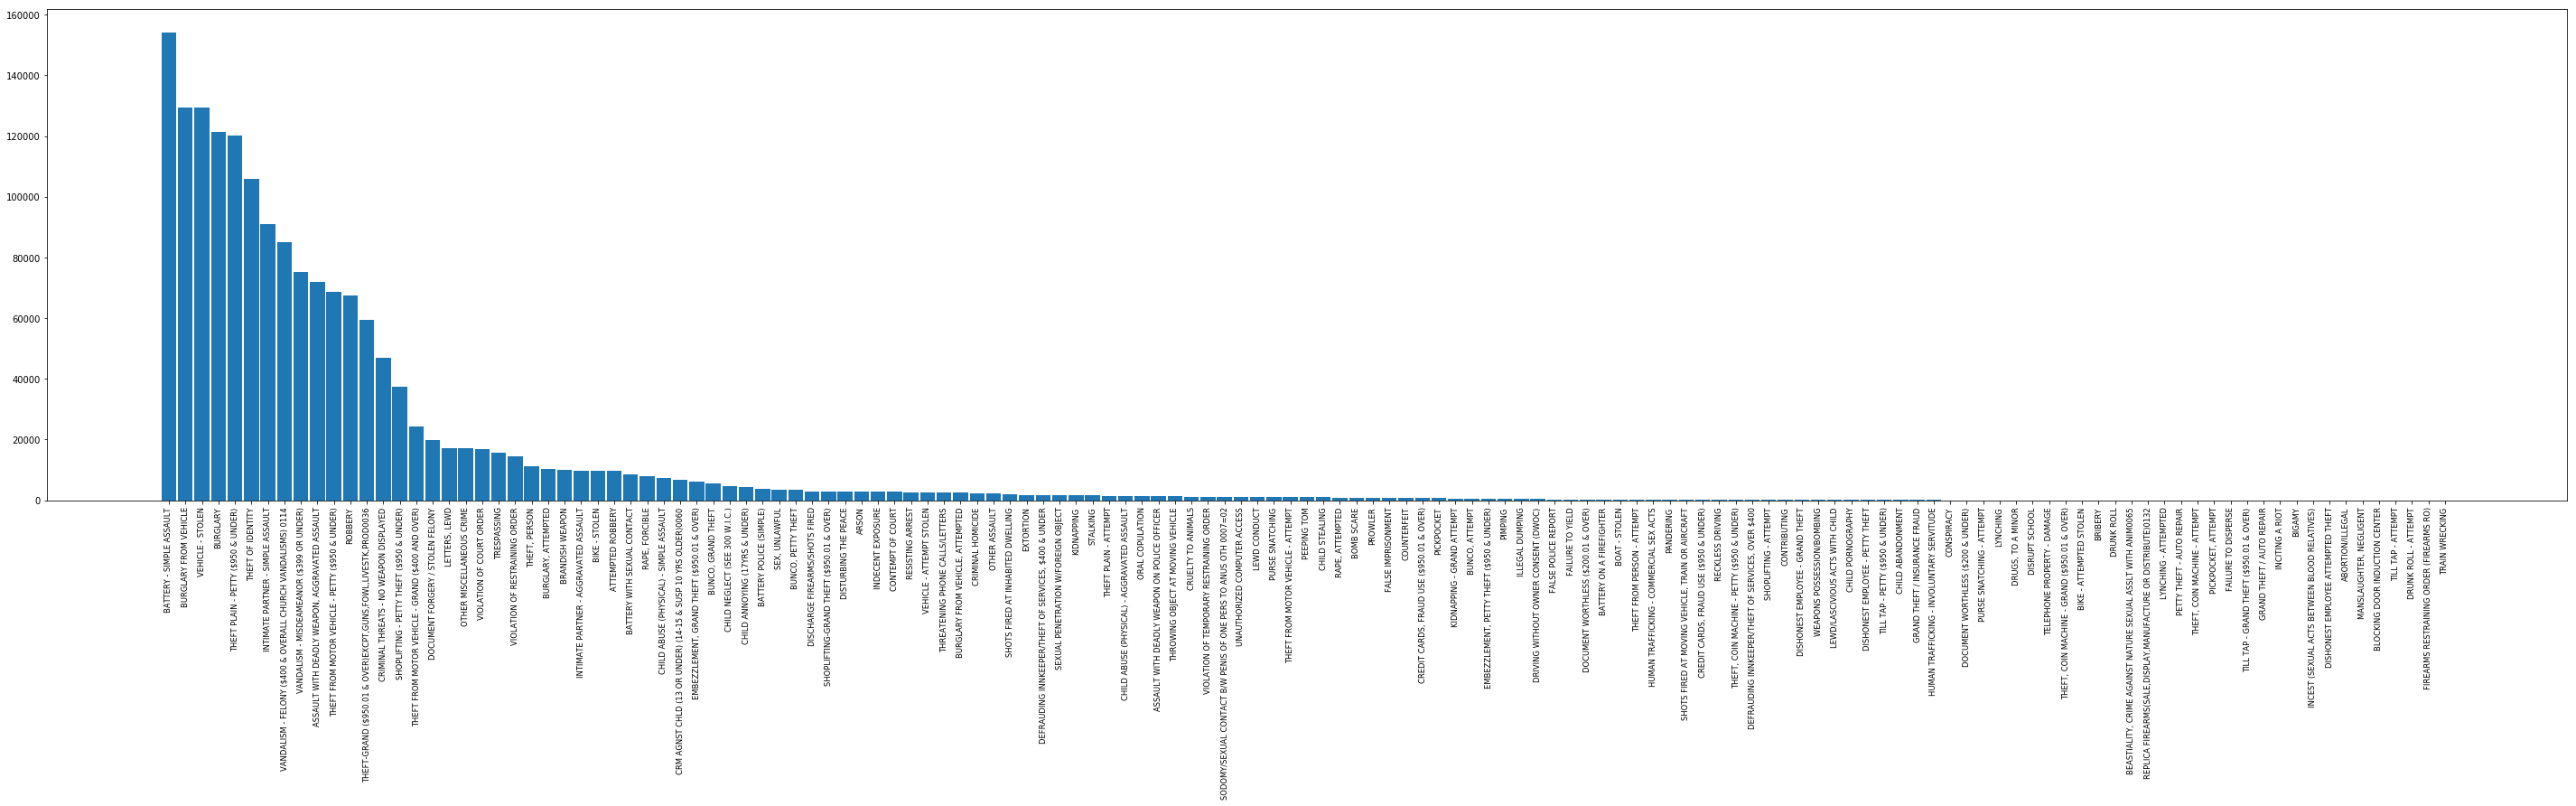

In [4]:
crime_dist = {}

# Translated Crime Code numbers to crime descriptions
def code_to_string(code):
    if str(code) in crime_codes.keys():
        return crime_codes[str(code)]
    else:
        print('Error: crime code ' + str(code) + 'isn\'t in lapd_codes/crime_codes')

# Count every crime's primary crime code
for crime_code in df['crm_cd']:
    if code_to_string(crime_code) in crime_dist.keys():
        crime_dist[code_to_string(crime_code)] += 1
    else:
        crime_dist[code_to_string(crime_code)] = 1

# Sort crime based on most recorded instances
crime_dist = OrderedDict(sorted(crime_dist.items(), key=lambda t: t[1], reverse=True))

# Plot crime distribution
plt.figure(figsize=(50,10))
plt.bar(range(len(crime_dist)), list(crime_dist.values()), align='center', width=0.9)
plt.xticks(range(len(crime_dist)), list(crime_dist.keys()), rotation=90)
plt.tick_params(axis='x', which='major', labelsize='small')
plt.show()

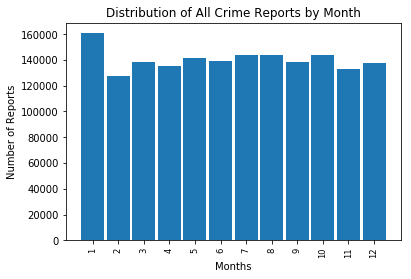

In [11]:
distribution_data = {}

# Count number of crimes per month
for date in df['date_occ']:
    month = int(datetime.strptime(date, '%Y-%m-%dT%H:%M:%S.%f').month)

    if month in distribution_data.keys():
        distribution_data[month] += 1
    else:
        distribution_data[month] = 1

# Sort results dictionary based on keys
sorted(distribution_data.items())

# Create bar plot of result values
plt.bar(range(len(distribution_data)), list(distribution_data.values()), align='center', width=0.9)

# Add titles to plot
plt.title('Distribution of All Crime Reports by Month')
plt.xlabel('Months')
plt.ylabel('Number of Reports')

# Give xticks proper labels and rotation
plt.xticks(range(len(distribution_data)), list(distribution_data.keys()), rotation=90)
plt.tick_params(axis='x', which='major', labelsize='small')

# Show Plot
plt.show()

In [ ]:
battery_simple = df.loc[df['crm_cd'] == 624]

In [16]:
def crime_month_distribution(crime_code):
    # Get all crime reports for a specific crime code
    crime_data = df.loc[df['crm_cd'] == crime_code]
    
    # Count number of crimes per month
    distribution_data = {}

    for date in crime_data['date_occ']:
        month = int(datetime.strptime(date, '%Y-%m-%dT%H:%M:%S.%f').month)

        if month in distribution_data.keys():
            distribution_data[month] += 1
        else:
            distribution_data[month] = 1
    
    # Sort results dictionary based on keys
    sorted(distribution_data.items())
    
    # Create bar plot of result values
    plt.bar(range(len(distribution_data)), list(distribution_data.values()), align='center', width=0.9)
    
    # Add titles to plot
    plt.title('Distribution of "' + crime_codes[str(crime_code)] + '" Reports by Month')
    plt.xlabel('Months')
    plt.ylabel('Number of Reports')
    
    # Give xticks proper labels and rotation
    plt.xticks(range(len(distribution_data)), list(distribution_data.keys()), rotation=90)
    plt.tick_params(axis='x', which='major', labelsize='small')
    
    # Show plot
    plt.show()

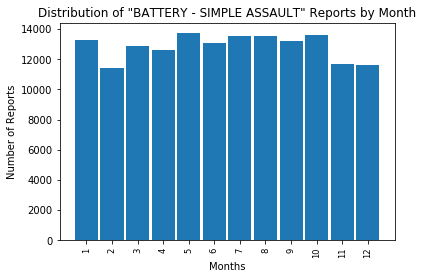

In [17]:
crime_month_distribution(624)

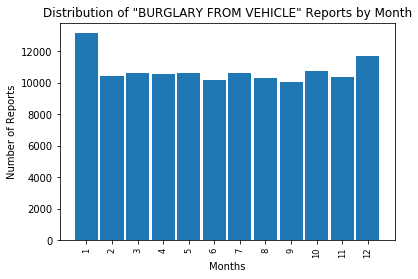

In [18]:
crime_month_distribution(330)

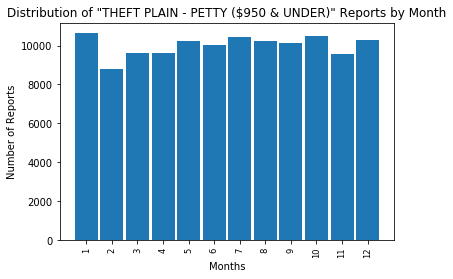

In [19]:
crime_month_distribution(440)

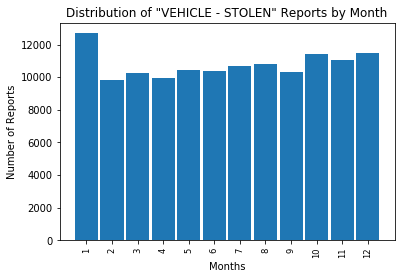

In [20]:
crime_month_distribution(510)

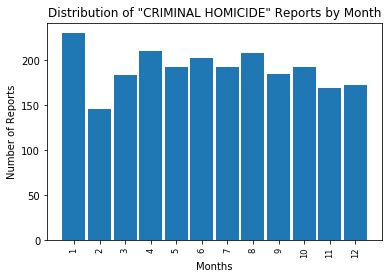

In [21]:
crime_month_distribution(110)

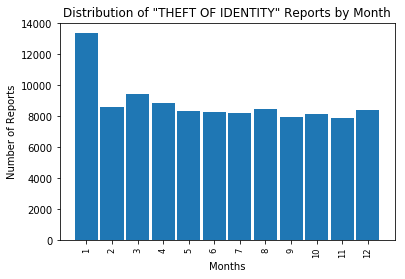

In [22]:
crime_month_distribution(354)